In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

path = '/content/drive/My Drive/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
datos=pd.read_csv("/content/drive/My Drive/Caso Real MDD - Dataset/201601.csv")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594412 entries, 0 to 594411
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   f_agenda        594412 non-null  object 
 1   h_agenda        594388 non-null  object 
 2   uo              594412 non-null  object 
 3   asignenf        594412 non-null  object 
 4   medico          594412 non-null  object 
 5   f_creacion      594412 non-null  object 
 6   u_creacion      594412 non-null  object 
 7   f_modificacion  594412 non-null  object 
 8   u_modificacion  577190 non-null  object 
 9   duracion        594412 non-null  int64  
 10  especialidad    593576 non-null  object 
 11  episodio        366684 non-null  float64
 12  anulado         137932 non-null  object 
 13  mot_anul        121898 non-null  object 
 14  f_anul          594412 non-null  object 
 15  h_anul          594388 non-null  object 
 16  poblacion       584867 non-null  object 
 17  distrito  

In [ ]:
datos

,f_agenda,h_agenda,uo,asignenf,medico,f_creacion,u_creacion,f_modificacion,u_modificacion,duracion,especialidad,episodio,anulado,mot_anul,f_anul,h_anul,poblacion,distrito,direccion,sexo,f_nacimiento,paciente,rut,aseguradora
0,14.01.2016,09:00:00,IBAGIOB,IBARP06,4777923-5,13.01.2016,AGENDAIT,13.01.2016,CCENTER,15,2420,NaN,NaN,NaN,00.00.0000,09:00:00,NaN,NaN,NaN,NaN,02.02.1982,10172567,15377213-4,NaN
1,26.01.2016,09:10:00,ILSMEGRA,ILSRP02A,13529539-6,25.01.2016,AGENDAIT,26.01.2016,TMOLINA,20,2690,37147336.0,NaN,NaN,00.00.0000,09:10:00,VILLA LA FLORIDA,LA SERENA,LINCOYAN 4255,1.0,21.11.1980,12137301,13876411-7,900001.0
2,08.01.2016,18:15:00,ITOTRAU,ITORP02,6572813-3,04.01.2016,AGENDAIT,04.01.2016,RROJASAA,15,3440,NaN,X,51,04.01.2016,18:15:00,X,X,X,1.0,11.11.1975,12561135,12881212-1,NaN
3,11.01.2016,18:00:00,ITOTRAU,ITORP02,6572813-3,05.01.2016,VAPEREZ,11.01.2016,CHENRIQUEZ,15,3440,NaN,X,OMO,11.01.2016,18:00:00,X,X,X,1.0,11.11.1975,12561135,12881212-1,NaN
4,12.01.2016,16:00:00,IPVTRAU,IPVRP05,8206865-1,07.01.2016,JRUBI,12.01.2016,AHARAYA,15,3440,36907162.0,NaN,NaN,00.00.0000,16:00:00,X,X,X,1.0,11.11.1975,12561135,12881212-1,900012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594407,05.01.2016,09:45:00,IALODINT,IALRP05N,6973018-3,03.01.2016,AGENDAIT,05.01.2016,EANDRADE,15,2910,36760407.0,NaN,NaN,00.00.0000,09:45:00,Santiago Centro,Santiago,Argomedo 190 Depto 1304,1.0,27.02.1989,15448939,17035083-9,NaN
594408,06.01.2016,09:45:00,IALODEND,IALRP05N,15831208-5,05.01.2016,EANDRADE,06.01.2016,EANDRADE,15,2900,36784985.0,NaN,NaN,00.00.0000,09:45:00,Santiago Centro,Santiago,Argomedo 190 Depto 1304,1.0,27.02.1989,15448939,17035083-9,NaN
594409,13.01.2016,11:00:00,IALODEND,IALRP05N,15831208-5,06.01.2016,MCORTEZ,13.01.2016,ECID,75,2900,36784985.0,NaN,NaN,00.00.0000,11:00:00,Santiago Centro,Santiago,Argomedo 190 Depto 1304,1.0,27.02.1989,15448939,17035083-9,NaN
594410,27.01.2016,11:00:00,IALODEND,IALRP05N,15831208-5,13.01.2016,MCORTEZ,27.01.2016,BCARRILLOC,60,2900,36784985.0,NaN,NaN,00.00.0000,11:00:00,Santiago Centro,Santiago,Argomedo 190 Depto 1304,1.0,27.02.1989,15448939,17035083-9,NaN


In [ ]:
datos=datos.drop_duplicates()
# determinar delta de dias entre creacion y agendacion

datos['f_agenda'] = pd.to_datetime(datos['f_agenda'])
datos['f_creacion'] = pd.to_datetime(datos['f_creacion'])
datos['deltaCreacionAgenda'] = (datos['f_agenda'] - datos['f_creacion']).dt.days
datos['diaSemanaAgendamiento']= datos['f_agenda'].dt.dayofweek

datos = datos.loc[datos.h_agenda.notnull()]

datos['horaAgendamiento'] = pd.to_datetime(datos['h_agenda']).dt.hour.astype(int)
datos['horaAgendamiento'] = pd.factorize(datos['horaAgendamiento'])[0]

datos = datos.loc[(datos.deltaCreacionAgenda >= 0)]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

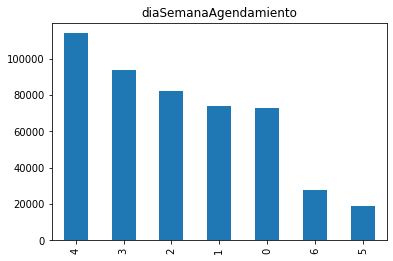

In [ ]:
plot= datos['diaSemanaAgendamiento'].value_counts().plot(kind='bar',title="diaSemanaAgendamiento");
plt.show(plot)

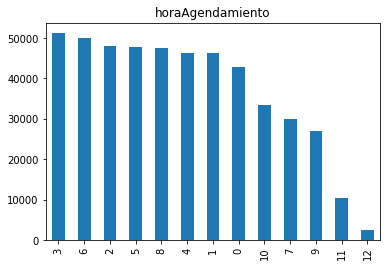

In [ ]:
plot= datos['horaAgendamiento'].value_counts().plot(kind='bar',title="horaAgendamiento");
plt.show(plot)

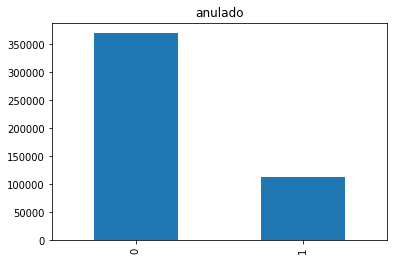

In [ ]:

datos["anulado"] = datos["anulado"].replace(to_replace = np.nan, value = 0);
datos["anulado"] = datos["anulado"].replace(to_replace = 'X', value = 1);

plot= datos['anulado'].value_counts().plot(kind='bar',title="anulado");
plt.show(plot)


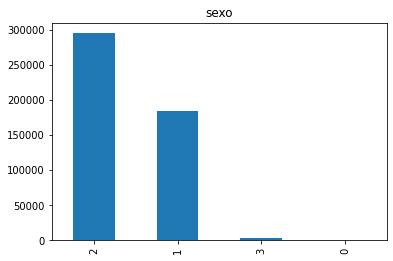

In [ ]:
datos["sexo"] = datos["sexo"].replace(np.nan,0);
datos["sexo"] = datos["sexo"].astype(int)

plot= datos['sexo'].value_counts().plot(kind='bar',title="sexo");
plt.show(plot)

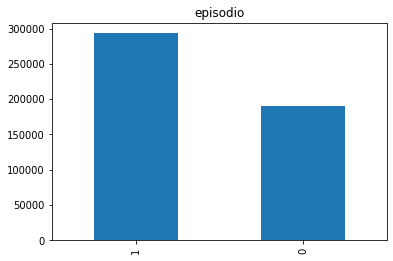

In [ ]:
#target

datos.loc[datos.episodio.notnull(),'episodio'] = 1;
datos["episodio"] = datos["episodio"].replace(np.nan,0);
datos["episodio"] = datos["episodio"].astype(int)

plot= datos['episodio'].value_counts().plot(kind='bar',title="episodio");
plt.show(plot)



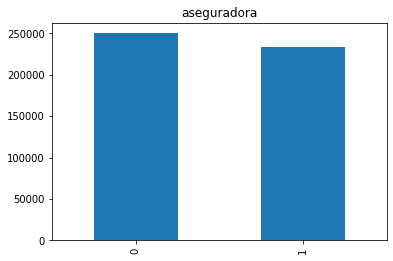

In [ ]:
datos.loc[datos.aseguradora.notnull(),'aseguradora'] = 1;
datos["aseguradora"] = datos["aseguradora"].replace(np.nan,0);
datos["aseguradora"] = datos["aseguradora"].astype(int)

plot= datos['aseguradora'].value_counts().plot(kind='bar',title="aseguradora");
plt.show(plot)

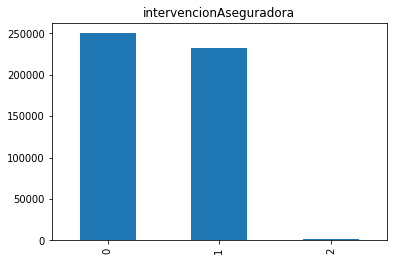

In [ ]:
datos['intervencionAseguradora']=datos['anulado'].astype(str)+datos['aseguradora'].astype(str)
datos.loc[(datos.intervencionAseguradora=='00') ,'intervencionAseguradora']=0;
datos.loc[(datos.intervencionAseguradora=='10') ,'intervencionAseguradora']=0;
datos.loc[(datos.intervencionAseguradora=='01') ,'intervencionAseguradora']=1;
datos.loc[(datos.intervencionAseguradora=='11') ,'intervencionAseguradora']=2;
datos['intervencionAseguradora']=datos['intervencionAseguradora'].astype(int)
plot= datos['intervencionAseguradora'].value_counts().plot(kind='bar',title="intervencionAseguradora");
plt.show(plot)


In [ ]:
#usar distrito como variable cualitativa

datos['distrito'] = pd.factorize(datos['distrito'])[0]


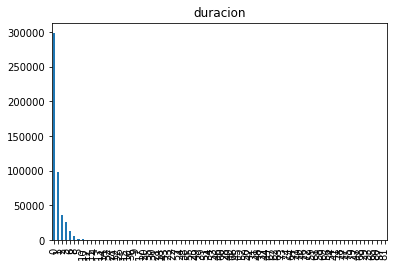

In [ ]:
#usar duracion como variable cualitativa
datos['duracion'] = pd.factorize(datos['duracion'])[0]
plot= datos['duracion'].value_counts().plot(kind='bar',title="duracion");
plt.show(plot)

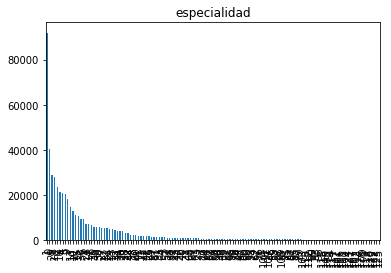

In [ ]:
#usar especialidad como variable cualitativa

datos['especialidad'] = pd.factorize(datos['especialidad'])[0]
plot= datos['especialidad'].value_counts().plot(kind='bar',title="especialidad");
plt.show(plot)

In [ ]:
datos2 = datos.drop(['f_agenda', 'h_agenda','f_creacion','f_modificacion','f_anul','h_anul', 'f_nacimiento','uo',"medico","u_modificacion","asignenf","poblacion","direccion","paciente","rut","mot_anul","u_creacion"], axis=1) #Eliminar columnas correlacionales a global_sales
datos2

,duracion,especialidad,episodio,anulado,distrito,sexo,aseguradora,deltaCreacionAgenda,diaSemanaAgendamiento,horaAgendamiento,intervencionAseguradora
0,0,0,0,0,-1,0,0,1,3,0,0
1,1,1,1,0,0,1,1,1,1,0,1
2,0,2,0,1,1,1,0,122,0,1,0
3,0,2,0,1,1,1,0,184,1,1,0
4,0,2,1,0,1,1,1,153,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
594406,0,2,1,0,8,2,1,1,2,10,1
594407,0,18,1,0,38,1,0,61,6,0,0
594408,0,53,1,0,38,1,0,31,2,0,0
594410,8,53,1,0,38,1,0,14,2,3,0
